In [ ]:
# All models for bubble size (diameter)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



Decision Tree Performance Metrics:
Training RMSE: 0.0000
Testing RMSE: 0.0002
Training MSE: 0.0000
Testing MSE: 0.0000
Training MAE: 0.0000
Testing MAE: 0.0001
Training R2: 1.0000
Testing R2: 0.9963

Random Forest Performance Metrics:
Training RMSE: 0.0001
Testing RMSE: 0.0002
Training MSE: 0.0000
Testing MSE: 0.0000
Training MAE: 0.0000
Testing MAE: 0.0001
Training R2: 0.9997
Testing R2: 0.9972

Gradient Boosting Performance Metrics:
Training RMSE: 0.0001
Testing RMSE: 0.0002
Training MSE: 0.0000
Testing MSE: 0.0000
Training MAE: 0.0001
Testing MAE: 0.0001
Training R2: 0.9988
Testing R2: 0.9981

XGBoost Performance Metrics:
Training RMSE: 0.0000
Testing RMSE: 0.0003
Training MSE: 0.0000
Testing MSE: 0.0000
Training MAE: 0.0000
Testing MAE: 0.0001
Training R2: 1.0000
Testing R2: 0.9910


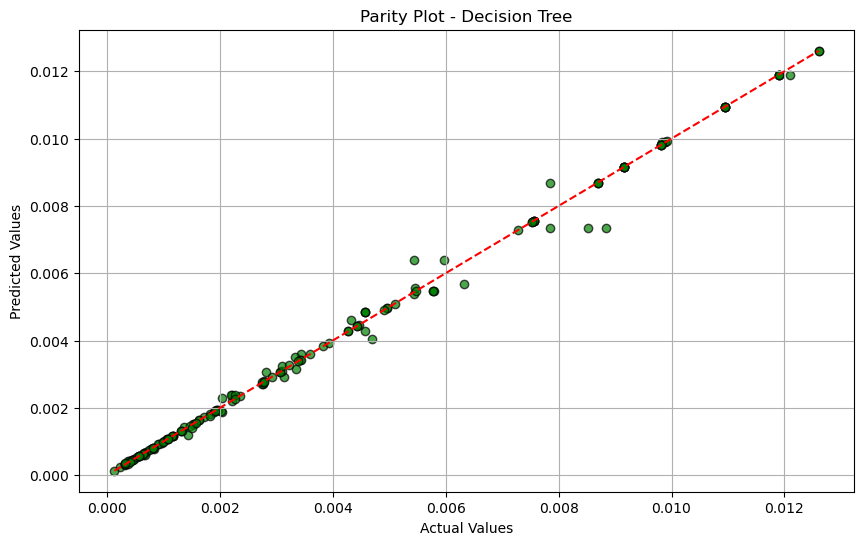

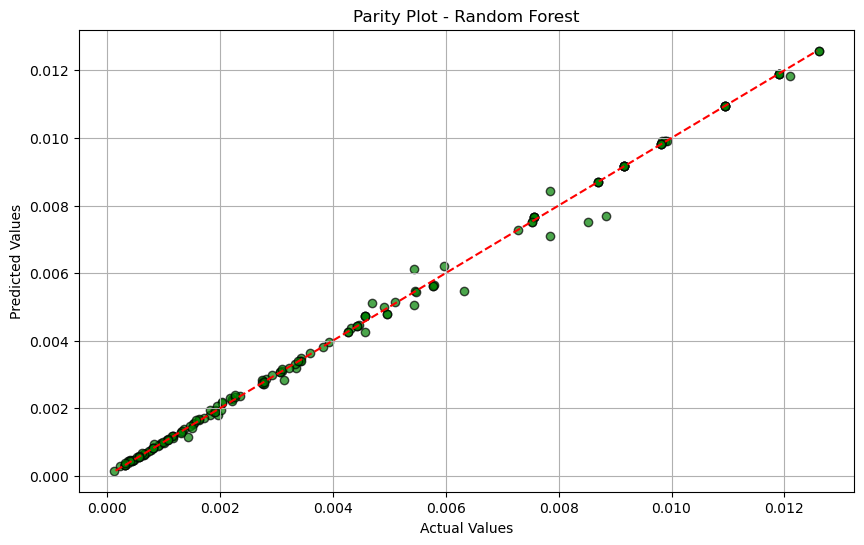

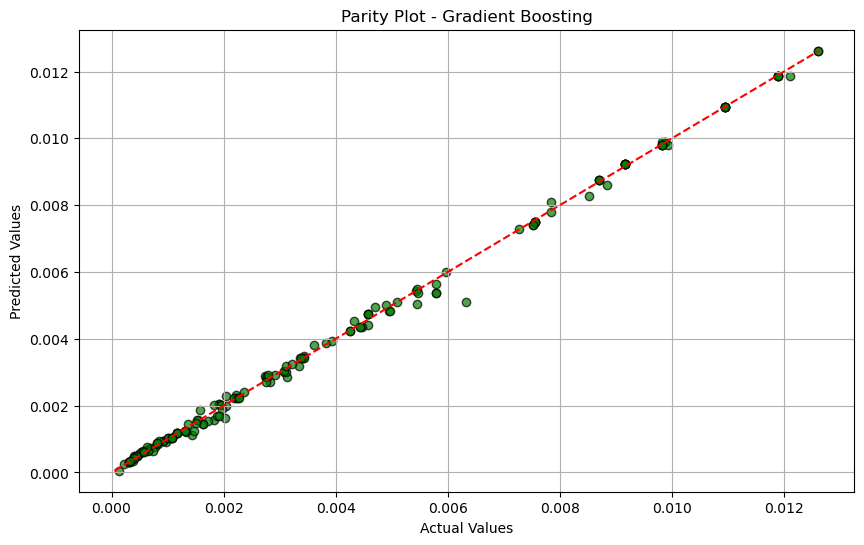

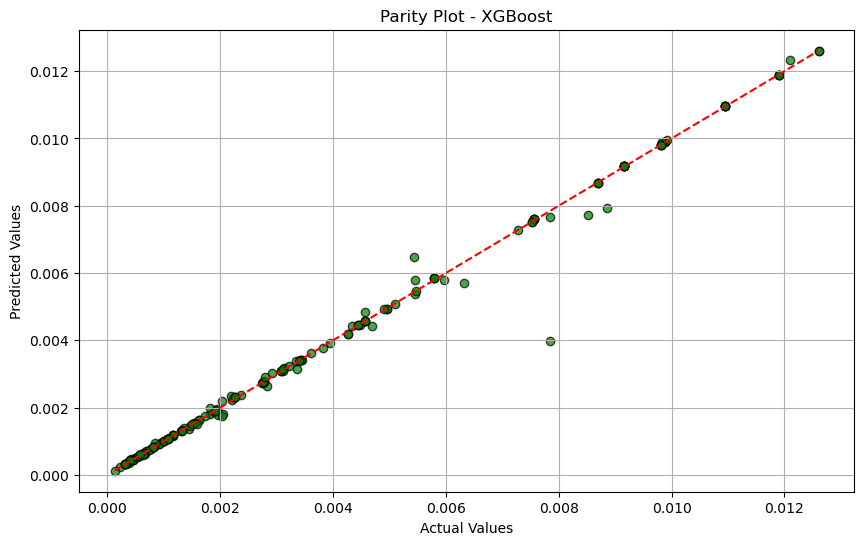

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel
data = pd.read_excel('Supporting_data.xlsx', sheet_name='db')
data.describe()

# Define input and output variables
X = data[['Fr', 'Bo', 'Ga', 'Density Ratio']]
z = data[['db']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

# Initialize MinMaxScaler
scaler_X = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize the scaler for the output variable
scaler_z = MinMaxScaler()

# Fit the scaler on the training output data and transform both training and testing data
z_train_scaled = scaler_z.fit_transform(z_train)
z_test_scaled = scaler_z.transform(z_test)

# Define the models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=0),
    'XGBoost': xgb.XGBRegressor(random_state=0)
}

# Dictionary to store performance metrics for each model
performance_metrics = {}

# Train each model, make predictions, and calculate metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, z_train_scaled)
    
    # Predict on training and testing data
    z_train_pred_scaled = model.predict(X_train_scaled)
    z_test_pred_scaled = model.predict(X_test_scaled)
    
    # Inverse transform the predictions to get them back to the original scale
    z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1))
    z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))
    
    # Calculate RMSE, MSE, MAE, and R2
    train_rmse = np.sqrt(mean_squared_error(z_train, z_train_pred))
    test_rmse = np.sqrt(mean_squared_error(z_test, z_test_pred))

    train_mse = mean_squared_error(z_train, z_train_pred)
    test_mse = mean_squared_error(z_test, z_test_pred)

    train_mae = mean_absolute_error(z_train, z_train_pred)
    test_mae = mean_absolute_error(z_test, z_test_pred)

    train_r2 = r2_score(z_train, z_train_pred)
    test_r2 = r2_score(z_test, z_test_pred)

    # Store the metrics in the dictionary
    performance_metrics[model_name] = {
        'Training RMSE': train_rmse,
        'Testing RMSE': test_rmse,
        'Training MSE': train_mse,
        'Testing MSE': test_mse,
        'Training MAE': train_mae,
        'Testing MAE': test_mae,
        'Training R2': train_r2,
        'Testing R2': test_r2
    }

# Print the performance metrics for each model
for model_name, metrics in performance_metrics.items():
    print(f"\n{model_name} Performance Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Plot parity plots for each model
for model_name, model in models.items():
    # Predict on test data
    z_test_pred_scaled = model.predict(X_test_scaled)
    z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1))

    # Parity plot for the output in the test data
    plt.figure(figsize=(10, 6))
    plt.scatter(z_test, z_test_pred, color='green', edgecolor='k', alpha=0.7)
    plt.plot([min(z_test_pred), max(z_test_pred)], [min(z_test_pred), max(z_test_pred)], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Parity Plot - {model_name}')
    plt.grid(True)
    plt.show()
